In [1]:
import Stripeline as Sl
using Healpix
using PrmMaps
using Plots

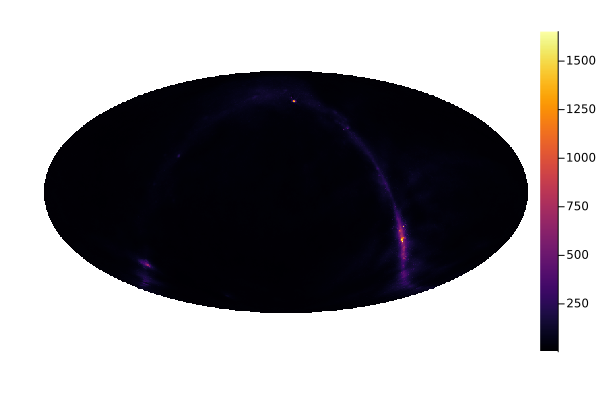

In [2]:
signal = readMapFromFITS("../input_maps/map_40GHz.fits", 1, Float64)
plot(signal)

In [3]:
const days_of_observation = 2.
const fsampl_hz = 59.
const total_time_s = days_of_observation * 24 * 3600

setup = Setup(
    τ_s = 1. / fsampl_hz,
    times = 0 : (1. / fsampl_hz) : total_time_s,
    NSIDE = 512
)

nothing

In [4]:
# We simulate the I0 horn that point towards [0.0,0.0,1.0]
cam_ang = Sl.CameraAngles()

telescope_ang_ideal = Sl.TelescopeAngles()

wheel2ang = deg2rad.([5.0,10.0])
wheel3ang = deg2rad.([5.0,10.0])
forkang = deg2rad.([5.0,10.0])

config_wheel2 = [Sl.TelescopeAngles(wheel2ang_0_rad = i) for i in wheel2ang]
config_wheel3 = [Sl.TelescopeAngles(wheel3ang_0_rad = i) for i in wheel3ang]
config_fork = [Sl.TelescopeAngles(forkang_rad = i) for i in forkang]

nothing

In [5]:
map_ideal = makeMap(cam_ang, telescope_ang_ideal, signal, setup)

nothing

In [6]:
p_wheel2 = makeMapPlots(cam_ang, config_wheel2, signal, map_ideal, setup)
p_wheel3 = makeMapPlots(cam_ang, config_wheel3, signal, map_ideal, setup)
p_fork = makeMapPlots(cam_ang, config_fork, signal, map_ideal, setup)

nothing

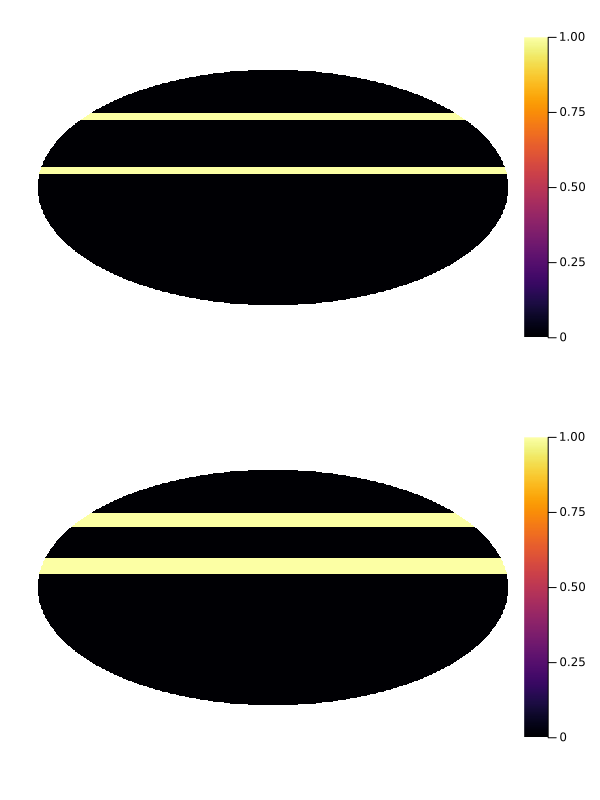

In [7]:
plot(p_wheel2..., layout = (length(p_wheel2), 1),size = (600, 400*length(p_wheel2)))

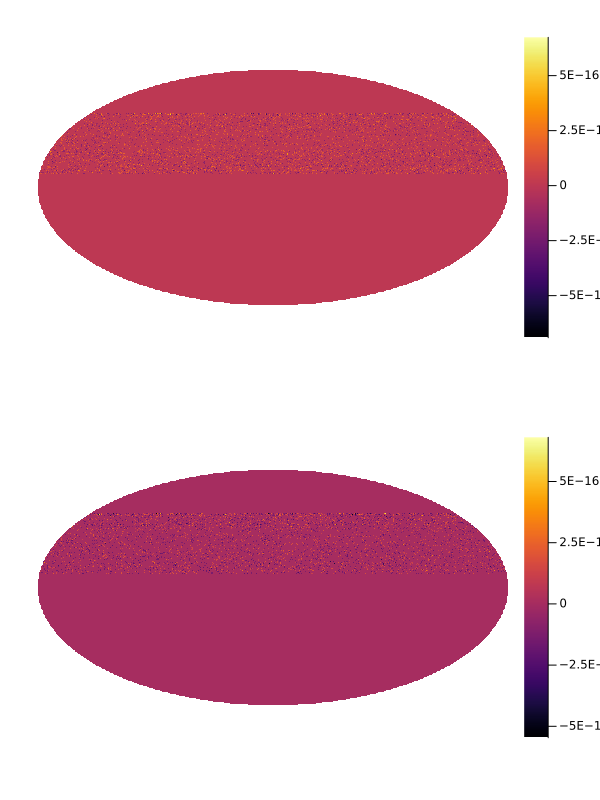

In [8]:
plot(p_wheel3..., layout = (length(p_wheel2), 1),size = (600, 400*length(p_wheel3)))

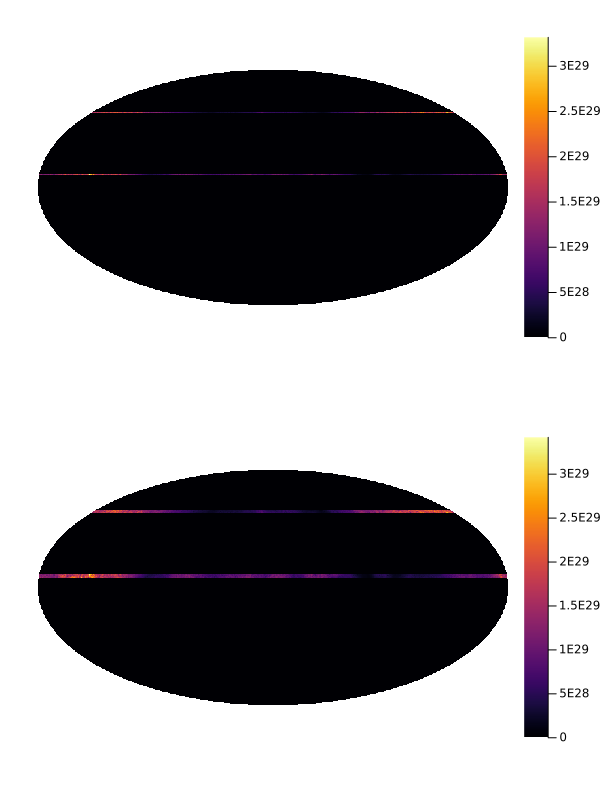

In [9]:
plot(p_fork..., layout = (length(p_fork), 1),size = (600, 400*length(p_fork)))